In [1]:
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.utils import to_categorical

2023-12-22 02:22:33.113008: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 02:22:33.289268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 02:22:33.289300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 02:22:33.315081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 02:22:33.373178: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

2023-12-22 02:22:35.412311: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:35.515676: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:35.515731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#データ準備
train_img_dir = "train-data"

files = glob.glob(train_img_dir + "/Resized/*.jpg")   #.jpgのパスを取得
files = sorted(files)
df_label = pd.read_csv(train_img_dir + "/hoge3.csv")

In [4]:
# file_pathとcsv行を抽出する
def inexclusion(num: int):
  return files[:num], df_label.head(num)

In [5]:
#ファイルを1000個まで抽出する（データが膨大なため）
# files, df_label = inexclusion(2000)

In [6]:
#リストに格納
file_list = []
for file in files:
  f = cv2.imread(file)
  f = cv2.resize(f, (256, 256))
  file_list.append(f)

#要素数の確認
print(len(file_list),len(df_label))

2757 2757


In [7]:
#画素値を正規化
file_list = [file.astype(float)/255 for file in file_list]
train_x, valid_x, train_y, valid_y = train_test_split(file_list, df_label, test_size=0.2)

print(len(train_x),len(valid_x),len(train_y),len(valid_y))

2205 552 2205 552


In [8]:
#クラス数（見分けたい種類）を指定csvファイルに依存
num_classes = df_label["card_status"].nunique()
num_classes

52

In [9]:
# train_y, valid_y をダミー変数化
train_y = to_categorical(train_y["card_status"])
valid_y = to_categorical(valid_y["card_status"])

In [10]:
print(train_y.shape)

(2205, 52)


In [11]:
print(valid_y.shape)

(552, 52)


In [12]:
# リスト型を配列型に
train_x = np.array(train_x)
valid_x = np.array(valid_x)

In [13]:
#層の定義
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

2023-12-22 02:22:42.244159: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:42.244236: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:42.244254: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:42.454994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 02:22:42.455048: I external/local_xla/xla/stream_executor

In [14]:
# モデルを構築
model.compile(optimizer=tf.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Early stoppingを適用してフィッティング

log = model.fit(train_x, train_y, epochs=100, batch_size=10, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=10,verbose=1)],
                validation_data=(valid_x, valid_y))

Epoch 1/100


2023-12-22 02:23:07.367886: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-22 02:23:07.993048: I external/local_xla/xla/service/service.cc:168] XLA service 0x151be910bb20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-22 02:23:07.993069: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-22 02:23:08.002940: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703211788.101943     155 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


221/221 [==============================] - 8s 22ms/step - loss: 6.5899 - accuracy: 0.0358 - val_loss: 3.9609 - val_accuracy: 0.0272
Epoch 2/100
221/221 [==============================] - 3s 16ms/step - loss: 3.9498 - accuracy: 0.0399 - val_loss: 3.9664 - val_accuracy: 0.0272
Epoch 3/100
221/221 [==============================] - 3s 15ms/step - loss: 3.9495 - accuracy: 0.0399 - val_loss: 3.9695 - val_accuracy: 0.0272
Epoch 4/100
221/221 [==============================] - 3s 16ms/step - loss: 3.9495 - accuracy: 0.0399 - val_loss: 3.9666 - val_accuracy: 0.0272
Epoch 5/100
221/221 [==============================] - 3s 15ms/step - loss: 3.9496 - accuracy: 0.0399 - val_loss: 3.9688 - val_accuracy: 0.0272
Epoch 6/100
221/221 [==============================] - 3s 15ms/step - loss: 3.9493 - accuracy: 0.0399 - val_loss: 3.9715 - val_accuracy: 0.0272
Epoch 7/100
221/221 [==============================] - 3s 15ms/step - loss: 3.9496 - accuracy: 0.0399 - val_loss: 3.9694 - val_accuracy: 0.0272
Epoc

In [16]:
#学習の状態確認
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [21]:
#モデルの保存
model_name = 'model_1222'
model.save("models/" + model_name)

INFO:tensorflow:Assets written to: models/model_1222/assets


INFO:tensorflow:Assets written to: models/model_1222/assets


In [18]:
loss,accuracy = model.evaluate(valid_x,valid_y,verbose = 0)
print('Accuracy','{:.2f}'.format(accuracy))

Accuracy 0.03


In [19]:
#推論画像の読み込み
files = glob.glob(img_dir + "/*.jpg")
last_file = files[::-1][0]

NameError: name 'img_dir' is not defined

In [18]:
#保存済みのモデルの読み込み
new_model = tf.keras.models.load_model(model_name)

In [19]:
#推論画像のパスの表示（人間用）
print(last_file,files[0])

Resized/s-5S23.jpg Resized/s-9C39.jpg


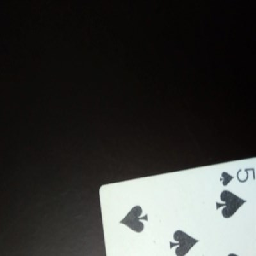

In [20]:
#推論画像の格納、配列化、表示
img = tf.keras.preprocessing.image.load_img(last_file, target_size=(256, 256, 3))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

img

In [21]:
#推論開始
%%time
result = np.argmax(new_model.predict(img_array))

UsageError: Line magic function `%%time` not found.


In [22]:
# train.csv等のgender_statusの値と等しい(gender_statusが0始まりだから)
result

NameError: name 'result' is not defined